In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exam_scores.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [12]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [5]:
df.describe()


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [66]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [15]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,frequently,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [14]:
#replace string values

df["PracticeSport"] = df["PracticeSport"].str.replace("regularly", "frequently")

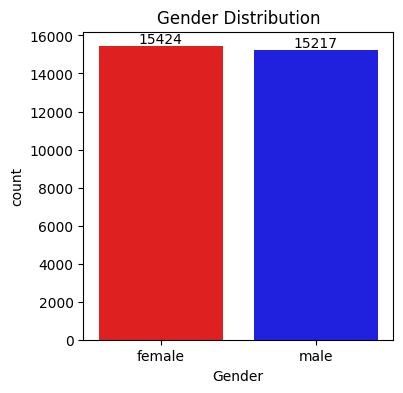

In [34]:
# Gender distribution
# Create a figure with a specified size of 4x4 inches
figure = plt.figure(figsize=(4, 4))

# Create a count plot for the 'Gender' column in the DataFrame `df`
# 'hue' is set to 'Gender' to color the bars by gender
# 'palette' specifies the colors for the bars
# 'dodge=False' ensures bars are not split for each hue level
# 'legend=False' disables the legend
ax = sns.countplot(data=df, x="Gender", hue="Gender", palette=["red", "blue"], dodge=False, legend=False)

# Add labels on top of the bars for the first container (typically the first gender)
ax.bar_label(ax.containers[0])

# Add labels on top of the bars for the second container (typically the second gender)
ax.bar_label(ax.containers[1])

# Set the title of the plot
plt.title('Gender Distribution')

# Display the plot
plt.show()

#analysis the chart by Gender


In [ ]:
#Parent_education_relation_with_other variable

In [36]:
par = df.groupby("ParentEduc").agg({"MathScore":'mean',	"ReadingScore":'mean', "WritingScore": 'mean'})
print(par)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


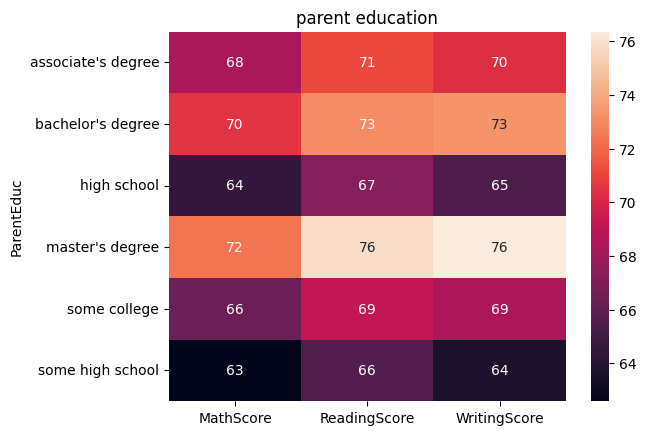

In [40]:
sns.heatmap(par, annot= True)
plt.title('parent education')
plt.show()

In [41]:
#Parent_marital_status_relation_with_other variable

parM = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',	"ReadingScore":'mean', "WritingScore": 'mean'})
print(par)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


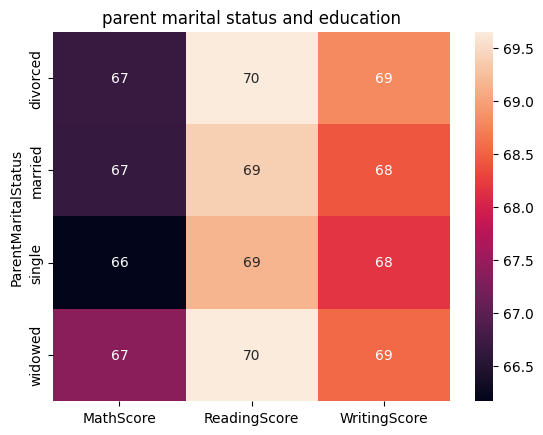

In [43]:
sns.heatmap(parM, annot= True)
plt.title('parent marital status and education')
plt.show()




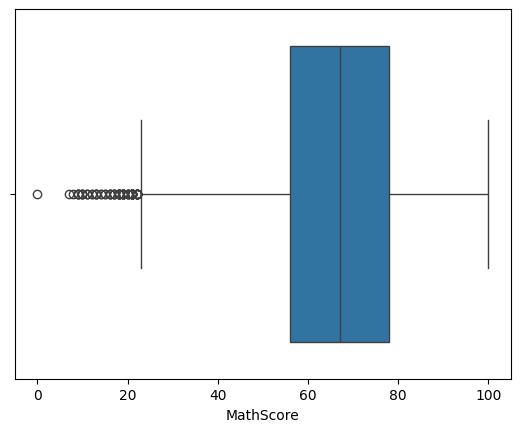

In [44]:
sns.boxplot(data = df, x ="MathScore")
plt.show()

In [47]:
 EthnicGroup = df["EthnicGroup"].unique()
print(EthnicGroup)


[nan 'group C' 'group B' 'group A' 'group D' 'group E']


#distribution of Ethnic group

In [49]:
groupA = df.loc[df["EthnicGroup"] == 'group A'].count()
print(groupA)


Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


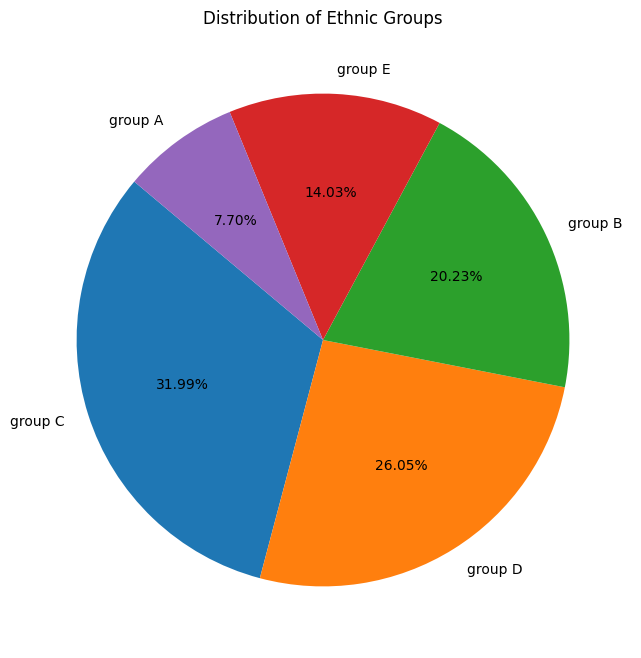

In [51]:
ethnic_group_counts = df['EthnicGroup'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ethnic_group_counts, labels=ethnic_group_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Ethnic Groups')
plt.show()

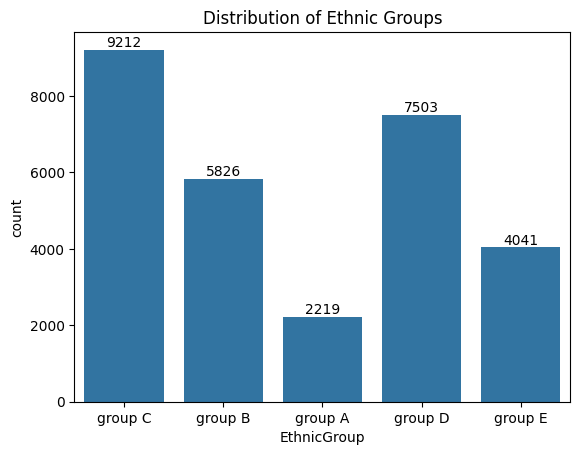

In [65]:
#make bar graph based on Ethnic Group

m = sns.countplot(data = df, x = 'EthnicGroup')
m.bar_label(m.containers[0])
plt.title('Distribution of Ethnic Groups')
plt.show()
